In [8]:
#initialization 
import matplotlib.pyplot as plt
import numpy as np

from warnings import simplefilter 
simplefilter(action='ignore', category=DeprecationWarning)

#importing qiskit
from qiskit import IBMQ, Aer, assemble, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Operator
from qiskit.circuit import Parameter, ParameterVector

#import basic plot tools
from qiskit.visualization import plot_histogram, plot_state_city

In [9]:
parameter_0 = Parameter('theta[0]')
parameter_1 = Parameter('theta[1]')
circuit = QuantumCircuit(1)

circuit.ry(theta=parameter_0, qubit=0)
circuit.rx(theta=parameter_1, qubit=0)
circuit.draw()

┌──────────────┐┌──────────────┐
q_0: ┤ RY(theta[0]) ├┤ RX(theta[1]) ├
     └──────────────┘└──────────────┘

In [10]:
n = 3
num_layers = 2

parameters = ParameterVector('theta', n*(num_layers+1))

circuit = QuantumCircuit(n,n)
for layer in range(num_layers):
    for i in range(n):
        circuit.ry(parameters[n*layer+i], i)
    circuit.barrier()

    # appending the entangling CNOT gates
    for i in range(n):
        for j in range(i):
            circuit.cx(j,i)
    circuit.barrier()

# appending one additional layer of parameterized Ry gates
for i in range(n):
    circuit.ry(parameters[n*num_layers+i], i)
circuit.barrier()

circuit.draw(fold=-1)

┌──────────────┐ ░                 ░ ┌──────────────┐ ░                 ░ ┌──────────────┐ ░ 
q_0: ┤ RY(theta[0]) ├─░───■────■────────░─┤ RY(theta[3]) ├─░───■────■────────░─┤ RY(theta[6]) ├─░─
     ├──────────────┤ ░ ┌─┴─┐  │        ░ ├──────────────┤ ░ ┌─┴─┐  │        ░ ├──────────────┤ ░ 
q_1: ┤ RY(theta[1]) ├─░─┤ X ├──┼────■───░─┤ RY(theta[4]) ├─░─┤ X ├──┼────■───░─┤ RY(theta[7]) ├─░─
     ├──────────────┤ ░ └───┘┌─┴─┐┌─┴─┐ ░ ├──────────────┤ ░ └───┘┌─┴─┐┌─┴─┐ ░ ├──────────────┤ ░ 
q_2: ┤ RY(theta[2]) ├─░──────┤ X ├┤ X ├─░─┤ RY(theta[5]) ├─░──────┤ X ├┤ X ├─░─┤ RY(theta[8]) ├─░─
     └──────────────┘ ░      └───┘└───┘ ░ └──────────────┘ ░      └───┘└───┘ ░ └──────────────┘ ░ 
c: 3/═════════════════════════════════════════════════════════════════════════════════════════════

In [11]:
print(circuit.parameters)

{Parameter(theta[5]), Parameter(theta[6]), Parameter(theta[0]), Parameter(theta[7]), Parameter(theta[1]), Parameter(theta[4]), Parameter(theta[2]), Parameter(theta[8]), Parameter(theta[3])}


In [12]:
param_dict = {parameter: np.random.random() for parameter in parameters}
print(param_dict)
# assign parameters using assign_parameters method
new_circuit = circuit.assign_parameters(param_dict = param_dict)
new_circuit.draw(fold=-1)


{Parameter(theta[0]): 0.8025027583862592, Parameter(theta[1]): 0.3928064062685138, Parameter(theta[2]): 0.33500648322138926, Parameter(theta[3]): 0.9638409225737131, Parameter(theta[4]): 0.4489443829868528, Parameter(theta[5]): 0.07988610560883669, Parameter(theta[6]): 0.4512140096382987, Parameter(theta[7]): 0.6363386132818292, Parameter(theta[8]): 0.4423674073895717}


┌────────────┐ ░                 ░ ┌─────────────┐  ░                 ░ ┌─────────────┐ ░ 
q_0: ─┤ RY(0.8025) ├─░───■────■────────░─┤ RY(0.96384) ├──░───■────■────────░─┤ RY(0.45121) ├─░─
     ┌┴────────────┤ ░ ┌─┴─┐  │        ░ ├─────────────┤  ░ ┌─┴─┐  │        ░ ├─────────────┤ ░ 
q_1: ┤ RY(0.39281) ├─░─┤ X ├──┼────■───░─┤ RY(0.44894) ├──░─┤ X ├──┼────■───░─┤ RY(0.63634) ├─░─
     ├─────────────┤ ░ └───┘┌─┴─┐┌─┴─┐ ░ ├─────────────┴┐ ░ └───┘┌─┴─┐┌─┴─┐ ░ ├─────────────┤ ░ 
q_2: ┤ RY(0.33501) ├─░──────┤ X ├┤ X ├─░─┤ RY(0.079886) ├─░──────┤ X ├┤ X ├─░─┤ RY(0.44237) ├─░─
     └─────────────┘ ░      └───┘└───┘ ░ └──────────────┘ ░      └───┘└───┘ ░ └─────────────┘ ░ 
c: 3/═══════════════════════════════════════════════════════════════════════════════════════════

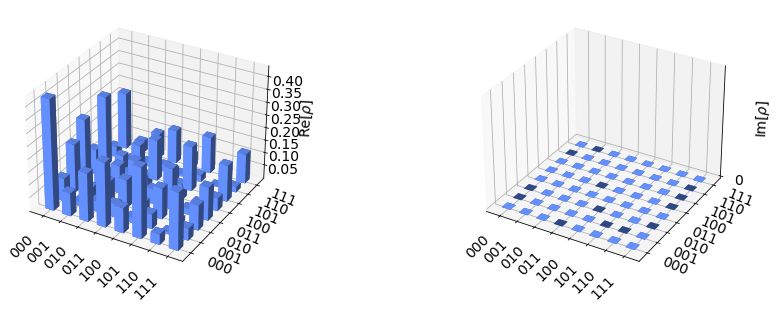

In [13]:
simulator = Aer.get_backend('statevector_simulator')
new_circuit = transpile(new_circuit, simulator)
result = simulator.run(assemble(new_circuit)).result()
statevector = result.get_statevector(new_circuit)
plot_state_city(statevector)

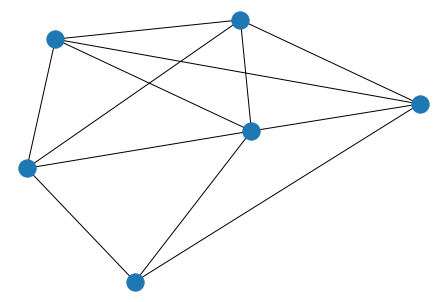

In [14]:
import networkx as nx

graph = nx.Graph()
# add nodes and edges
graph.add_nodes_from(np.arange(0,6,1))
edges = [(0,1,2.0), (0,2,3.0), (0,4,4.0), (0,5,1.0), (1,2,4.0), (1,3,1.0), (1,4,1.0), (1,5,3.0), (2,4,2.0), (2,5,3.0), (3,4,5.0), (3,5,1.0)]
graph.add_weighted_edges_from(edges)

nx.draw(graph)

In [16]:
from qiskit.optimization import QuadraticProgram
quadratic_program = QuadraticProgram('sample_program')
print(quadratic_program.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: sample_program

Minimize
 obj:
Subject To

Bounds
End



In [17]:
quadratic_program.binary_var(name = 'x_0')
quadratic_program.integer_var(name = 'x_1')
quadratic_program.continuous_var(name = 'x_2', lowerbound = -2.5, upperbound = 1.0)
print(quadratic_program.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: sample_program

Minimize
 obj:
Subject To

Bounds
 0 <= x_0 <= 1
 -2.500000000000 <= x_2 <= 1

Binaries
 x_0

Generals
 x_1
End



In [18]:
quadratic = [[0,1,2], [3,4,5], [0,1,2]]
linear = [10,20,30]

quadratic_program.minimize(quadratic=quadratic, linear=linear, constant=-5)
print(quadratic_program.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: sample_program

Minimize
 obj: 10 x_0 + 20 x_1 + 30 x_2 + [ 8 x_0*x_1 + 4 x_0*x_2 + 8 x_1^2 + 12 x_1*x_2
      + 4 x_2^2 ]/2 -5
Subject To

Bounds
 0 <= x_0 <= 1
 -2.500000000000 <= x_2 <= 1

Binaries
 x_0

Generals
 x_1
End

